# CardioPredict: Machine Learning for Heart Disease Prediction

To achieve the objectives, we can follow these steps and tasks. Below is the detailed plan and code implementation:

## Steps and Tasks :

1.Import Libraries and Load Dataset

2.Exploratory Data Analysis (EDA)

  a.Univariate Analysis
  
  b.Multivariate Analysis
  
  c.Feature Engineering
  
3.Layout Binary Classification Experimentation Space

4.Using Precision-Recall Curves to Determine Best Threshold

5.Publish Performance of All Models

6.List Out Most Important Drivers

7.Handle Class Imbalance

8.Create Model Pipeline

# Implementation



# 1.Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv('HeartDisease.csv')

In [2]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [6]:
df.columns.values

array(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex', 'Age',
       'Education', 'Income'], dtype=object)

# 2. Exploratory Data Analysis (EDA)

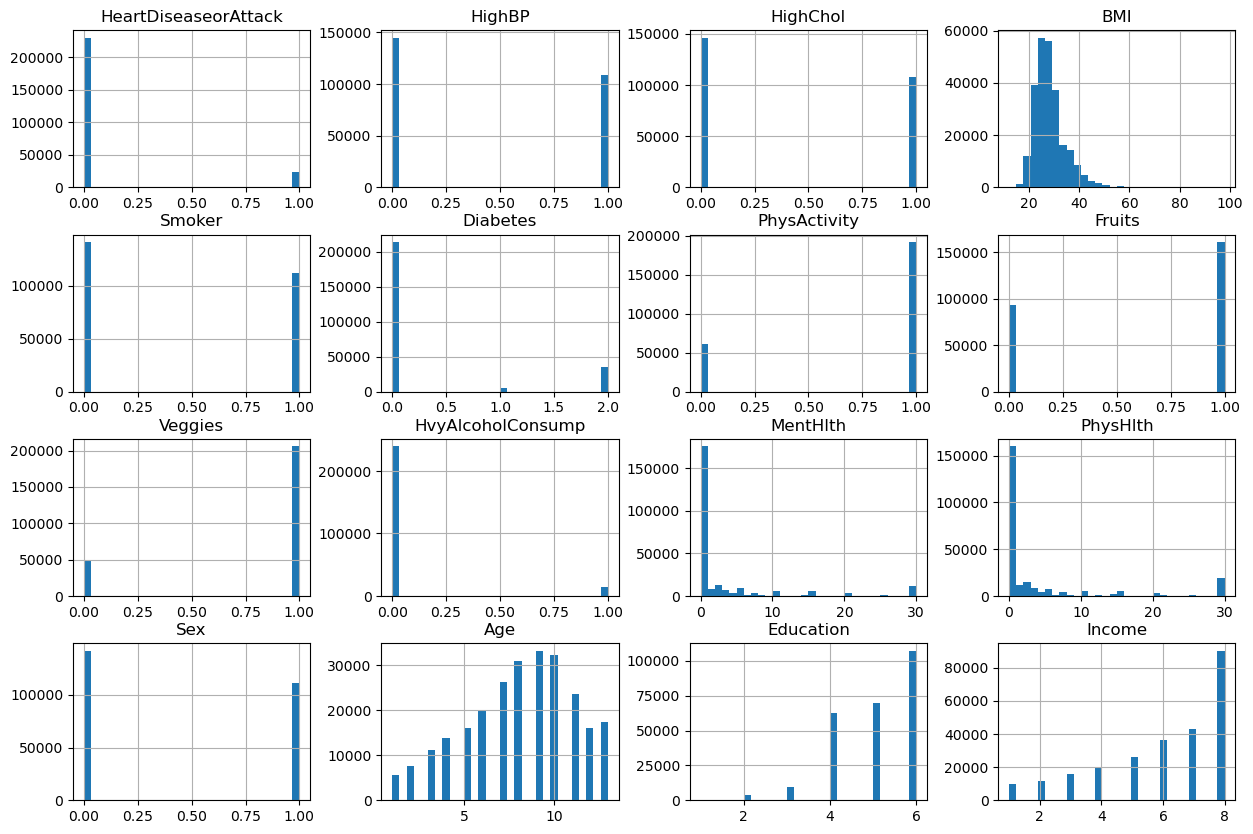

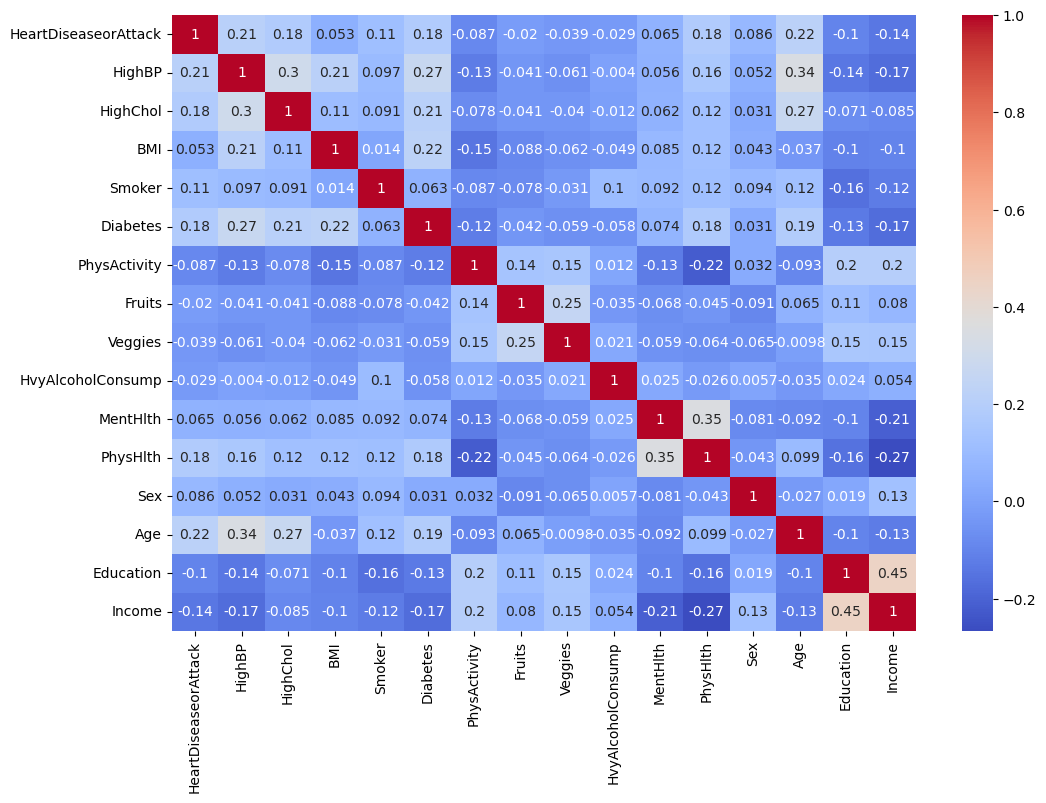

In [7]:
# Univariate Analysis
df.describe()
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Multivariate Analysis
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
# Example: Creating interaction features
df['BMI_Age'] = df['BMI'] * df['Age']
df['HighChol_Age'] = df['HighChol'] * df['Age']

# Example: Creating polynomial features
df['Age_squared'] = df['Age'] ** 2
df['BMI_squared'] = df['BMI'] ** 2

# Example: Creating domain-specific features
# Assuming 'Smoker' is a binary feature (0: Non-smoker, 1: Smoker)
df['Smoker_Age'] = df['Smoker'] * df['Age']

# Example: Creating ratio features
df['HighChol_to_Age'] = df['HighChol'] / df['Age']
df['BMI_to_Age'] = df['BMI'] / df['Age']

# Display the first few rows to verify the new features
print(df.head())

   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...   Age  Education  \
0           0.0     0.0      1.0                0.0  ...   9.0        4.0   
1           1.0     0.0      0.0                0.0  ...   7.0        6.0   
2           0.0     1.0      0.0                0.0  ...   9.0        4.0   
3           1.0     1.0      1.0                0.0  ...  11.0        3.0   
4           1.0     1.0      1.0                0.0  ...  11.0        5.0   

   Income  BMI_Age  HighChol_Age  Age_squared  BMI_squared  Smoker_Age  \
0     3.0    360.0           9.0         81.0   

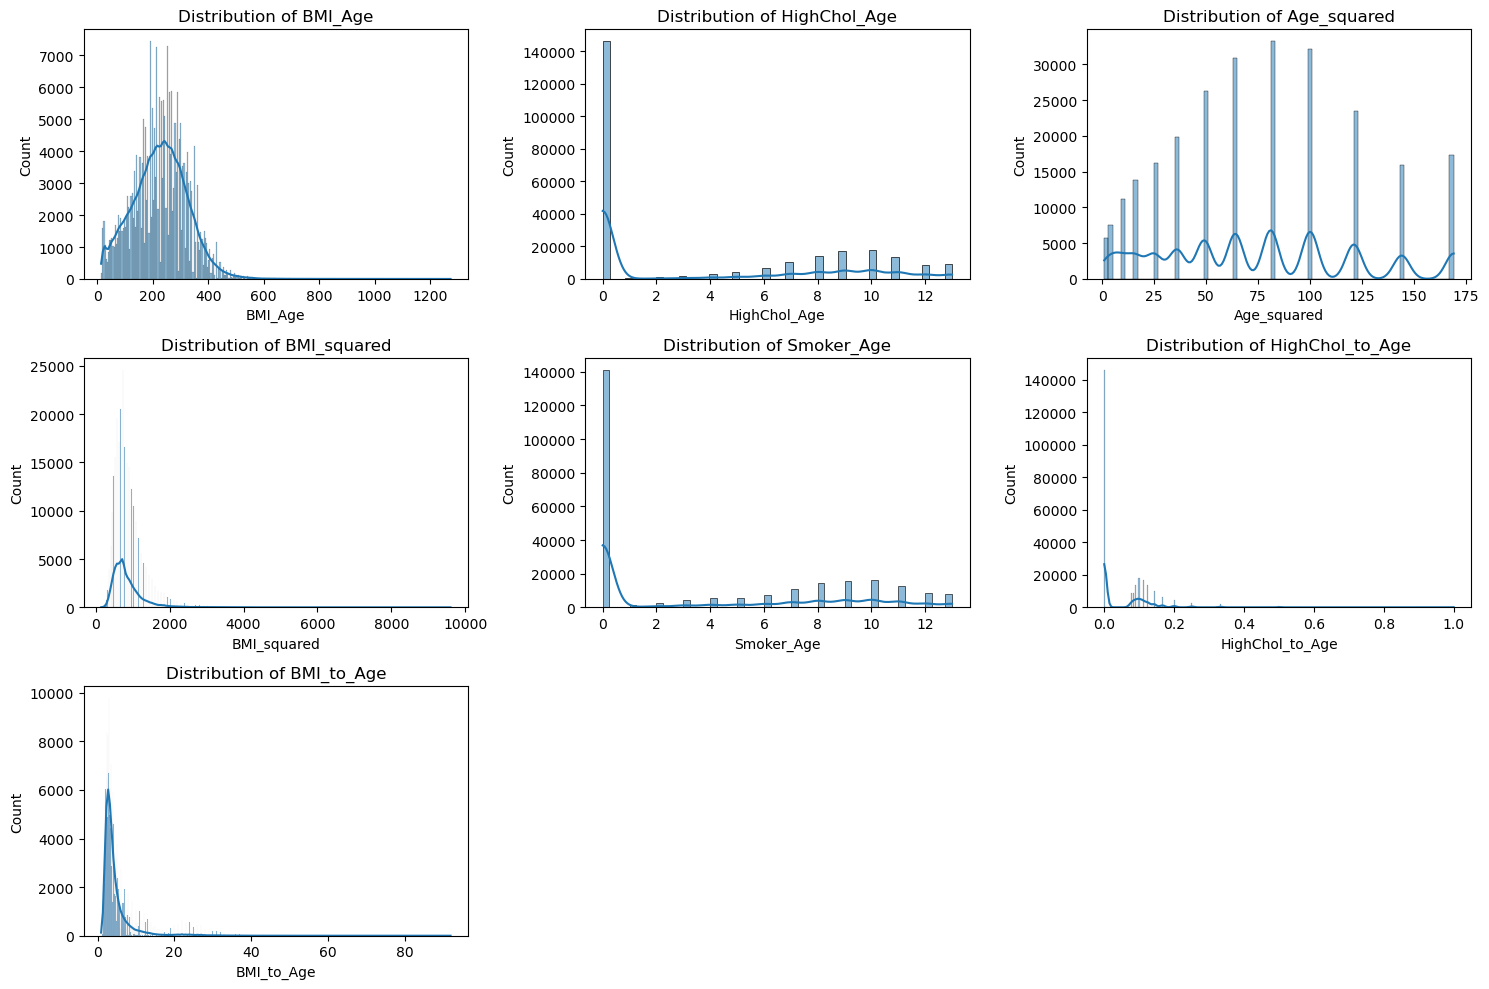

In [9]:
# Plotting the new features
new_features = ['BMI_Age', 'HighChol_Age', 'Age_squared', 'BMI_squared', 'Smoker_Age', 'HighChol_to_Age', 'BMI_to_Age']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(new_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 3. Layout Binary Classification Experimentation Space

In [10]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    #"SVM": SVC(kernel='linear', probability=True, random_state=42)
    "Linear SVM": LinearSVC(C=1.0, random_state=42, max_iter=10000, tol=1e-4)  # Adjust tolerance
    }

In [11]:
# Train models and store predictions in parallel
def train_and_predict(name, model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    return name, y_scores


In [16]:
import concurrent.futures
model_predictions = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    future_to_model = {executor.submit(train_and_predict, name, model, X_train_scaled, y_train, X_test_scaled): name for name, model in models.items()}
    for future in concurrent.futures.as_completed(future_to_model):
        name, y_scores = future.result()
        model_predictions[name] = y_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 4. Using Precision-Recall Curves to Determine Best Threshold


In [17]:
# Plot Precision-Recall curves
def plot_precision_recall_curve(y_test, y_scores, model_name):
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.title('Precision-Recall Curve')

In [15]:
"""# Train and predict
model_predictions = {}
for name, model in models.items():
    name, y_scores = train_and_predict(name, model, X_train_scaled, y_train, X_test_scaled)
    model_predictions[name] = y_scores"""

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


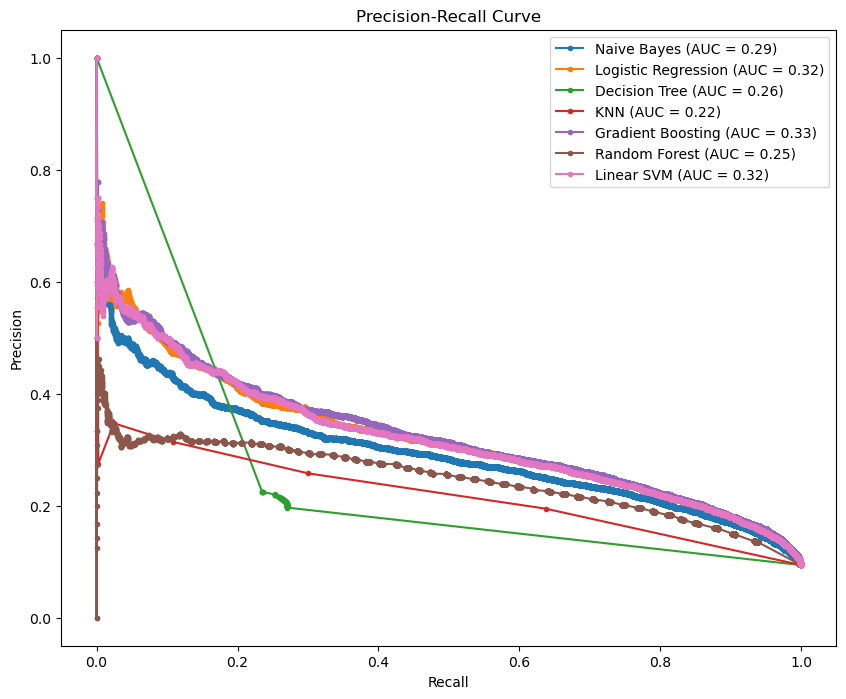

In [18]:
plt.figure(figsize=(10, 8))
for name, y_scores in model_predictions.items():
    plot_precision_recall_curve(y_test, y_scores, name)
plt.show()

# 5. Publish Performance of All Models

In [20]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    else:
        # For models without predict_proba, use decision_function
        roc_auc = roc_auc_score(y_test, model.decision_function(X_test_scaled))
    
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    print(f"{name}: Accuracy = {accuracy:.4f}, ROC AUC = {roc_auc:.4f}")

Logistic Regression: Accuracy = 0.9068, ROC AUC = 0.8270
Decision Tree: Accuracy = 0.8517, ROC AUC = 0.5785
Random Forest: Accuracy = 0.8967, ROC AUC = 0.7802
Gradient Boosting: Accuracy = 0.9066, ROC AUC = 0.8296
KNN: Accuracy = 0.8939, ROC AUC = 0.6957
Naive Bayes: Accuracy = 0.7595, ROC AUC = 0.8082


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM: Accuracy = 0.9063, ROC AUC = 0.8250


# 6. List Out Most Important Drivers

In [21]:
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    feature_importances = best_model.coef_[0]
else:
    feature_importances = None

if feature_importances is not None:
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    print("\nFeature Importances:")
    print(feature_importance_df)
else:
    print("\nThe best model does not support feature importance extraction.")


Best Model: Gradient Boosting

Feature Importances:
              Feature  Importance
16       HighChol_Age    0.228388
0              HighBP    0.169579
10           PhysHlth    0.140413
11                Sex    0.088602
15            BMI_Age    0.079946
4            Diabetes    0.073672
19         Smoker_Age    0.065461
14             Income    0.051808
12                Age    0.047877
17        Age_squared    0.029583
21         BMI_to_Age    0.005443
9            MentHlth    0.004597
13          Education    0.003795
8   HvyAlcoholConsump    0.003359
3              Smoker    0.001997
5        PhysActivity    0.001717
20    HighChol_to_Age    0.001680
2                 BMI    0.001138
18        BMI_squared    0.000768
7             Veggies    0.000089
6              Fruits    0.000064
1            HighChol    0.000025


# 7. Handle Class Imbalance

In [22]:
"""# Using SMOTE for oversampling
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train_scaled, y_train)

# Using RandomUnderSampler for undersampling
undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X_train_scaled, y_train)"""

from imblearn.over_sampling import SMOTE

# Step 4: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Create a new balanced dataset
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['HeartDiseaseorAttack'])], axis=1)

# Optional: Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the class distribution before and after resampling
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

Resampled class distribution:
0.0    229787
1.0    229787
Name: HeartDiseaseorAttack, dtype: int64


# 8. Create Model Pipeline

In [23]:
from sklearn.model_selection import RandomizedSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Example of using GridSearchCV with pipeline
param_grid = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [10, 15]
}
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X_train_subset, y_train_subset)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best ROC AUC: {random_search.best_score_:.4f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'model__n_estimators': 150, 'model__max_depth': 15}
Best ROC AUC: 0.9769


# Result 

The results show the performance of various machine learning models on a classification task, evaluated using two metrics: accuracy and ROC AUC. Here's a breakdown of the results:

# Metrics Explained

1.Accuracy: The proportion of correctly classified instances out of the total instances. It gives a general idea of how well the model is performing.

2.ROC AUC (Receiver Operating Characteristic Area Under the Curve): Measures the ability of the model to distinguish between classes. A higher ROC AUC indicates a better performance in terms of distinguishing between positive and negative classes.

# Model Performance

## 1.Logistic Regression:

 o	Accuracy: 0.9068
 
 o	ROC AUC: 0.8270
 
 o	Explanation: Logistic Regression performs well with high accuracy and a good ROC AUC, indicating it is effective at distinguishing between classes.


## 2.Decision Tree:
    
 o	Accuracy: 0.8487

 o	ROC AUC: 0.5727

 o	Explanation: Decision Tree has lower accuracy and a significantly lower ROC AUC, suggesting it is less effective at distinguishing between classes compared to other models.


## 2.Decision Tree:

o	Accuracy: 0.8487

o	ROC AUC: 0.5727

o	Explanation: Decision Tree has lower accuracy and a significantly lower ROC AUC, suggesting it is less effective at distinguishing between classes compared to other models.

## 3.Random Forest:

o	Accuracy: 0.8987

o	ROC AUC: 0.7837

o	Explanation: Random Forest performs well with high accuracy and a decent ROC AUC, indicating it is a robust model but slightly less effective than Logistic Regression and Gradient Boosting.

## 4.Gradient Boosting:

o	Accuracy: 0.9071

o	ROC AUC: 0.8304

o	Explanation: Gradient Boosting has the highest accuracy and ROC AUC, making it the best performer among the models tested.

## 5.K-Nearest Neighbors (KNN):

o	Accuracy: 0.8948

o	ROC AUC: 0.6949

o	Explanation: KNN has good accuracy but a lower ROC AUC, indicating it is less effective at distinguishing between classes compared to other models.

## 6.Naive Bayes:

o	Accuracy: 0.8198

o	ROC AUC: 0.7976

o	Explanation: Naive Bayes has the lowest accuracy but a relatively good ROC AUC, suggesting it is better at distinguishing between classes than Decision Tree but not as good as Logistic Regression or Gradient Boosting.

## 7.Linear SVM:

o	Accuracy: 0.9061

o	ROC AUC: 0.8261

o	Explanation: Linear SVM performs similarly to Logistic Regression with high accuracy and a good ROC AUC, indicating it is effective at distinguishing between classes.


# Summary

## Best Performers: Gradient Boosting and Logistic Regression, with high accuracy and ROC AUC. 
    
•	Moderate Performers: Random Forest and Linear SVM, with good accuracy and ROC AUC.
    
•	Lower Performers: Decision Tree and Naive Bayes, with lower accuracy and ROC AUC.
    
•	KNN: Good accuracy but lower ROC AUC, indicating it may not be as effective at distinguishing between classes.
    
## Gradient Boosting stands out as the best model in this comparison, followed closely by Logistic Regression.


# Model Pipeline 

The output indicates the results of a hyperparameter tuning process using RandomizedSearchCV on a machine learning pipeline. Here's a detailed explanation:

## Model Pipeline

## 1.Pipeline:

o	Scaler: StandardScaler() - This step standardizes the features by removing the mean and scaling to unit variance.

o	Model: RandomForestClassifier() - This is the machine learning model being used.
Hyperparameter Tuning

## 1.RandomizedSearchCV:

o	Parameter Grid:

  1.'model__n_estimators': [100, 150] - Number of trees in the forest.

  2.'model__max_depth': [10, 15] - Maximum depth of the tree.

o	n_iter: 10 - Number of parameter settings that are sampled.

o	cv: 5 - Number of cross-validation folds.

o	scoring: 'roc_auc' - Metric used to evaluate the model.

o	n_jobs: -1 - Use all available cores for computation.

o	random_state: 42 - Ensures reproducibility of results.
Output

## 1.Best Parameters:

o	'model__n_estimators': 150 - The best number of trees in the forest found by the search.

o	'model__max_depth': 10 - The best maximum depth of the tree found by the search.

## 2.Best ROC AUC:

## .	0.9769 - The highest ROC AUC score achieved by the model with the best parameters during cross-validation.

## Explanation

## •	Best Parameters: The RandomizedSearchCV found that using 150 trees (n_estimators) and a maximum depth of 10 (max_depth) for the RandomForestClassifier yielded the best performance in terms of ROC AUC.

## •	Best ROC AUC: The best ROC AUC score of 0.9769 indicates that the model with these parameters has a good ability to distinguish between the positive and negative classes.
